In [3]:
import pickle

import altair as alt
import pandas as pd
from benchmark_result import (
    BenchmarkType,
    get_no_delay_source,
    get_time_n_tasks_source,
)
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import Markdown, display
from utils import ms_to_seconds

InteractiveShell.ast_node_interactivity = "all"

In [4]:
# benchmark_results = get_benchmark_results()
with open('saved_results.pkl', 'rb') as saved_results:
    benchmark_results = pickle.load(saved_results)

## ipyparallel benchmark results ##

### time_n_tasks ###
The first benchmark comes from benchmarking the runtime of sending
n tasks to m engines. Where the each task is just the echo function. 

In [3]:
??echo

Signature: echo(delay=0)
Docstring: <no docstring>
Source:   
def echo(delay=0):
    def inner_echo(x, **kwargs):
        import time

        if delay:
            time.sleep(delay)
        return x

    return inner_echo
File:      ~/ipyparallel_master_project/benchmarks/utils.py
Type:      function


## With 16 cores:

### With a delay of 0.0s. :

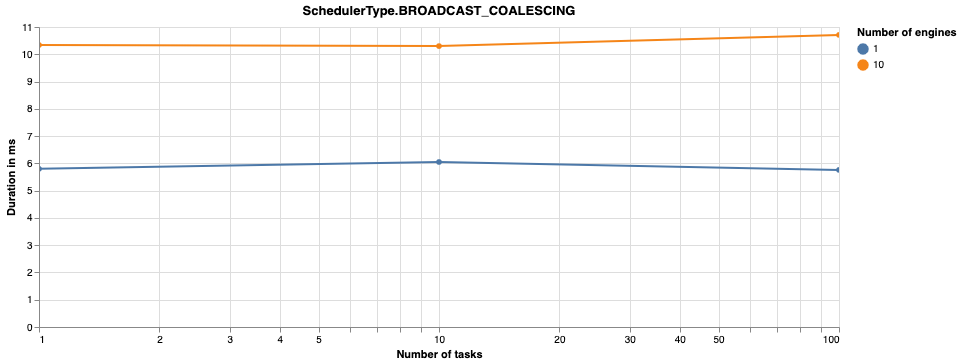

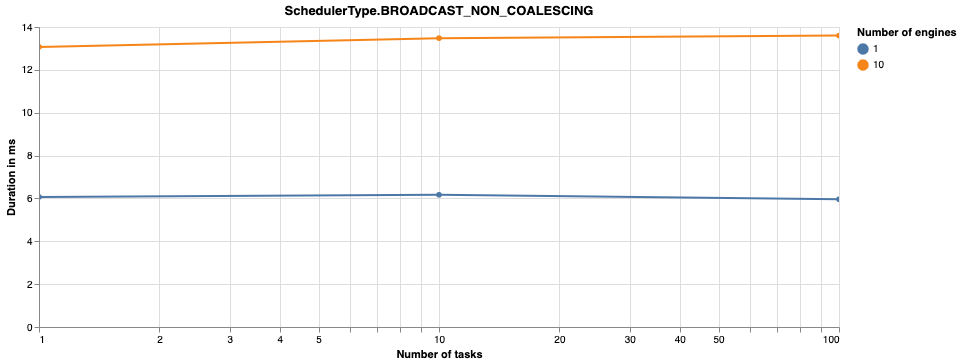

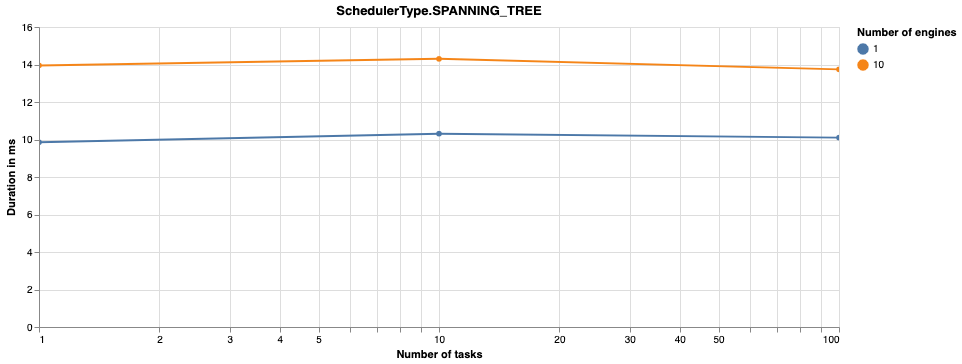

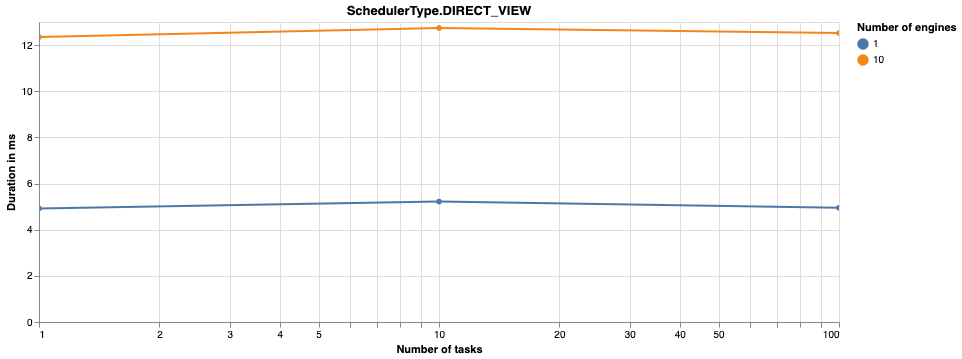

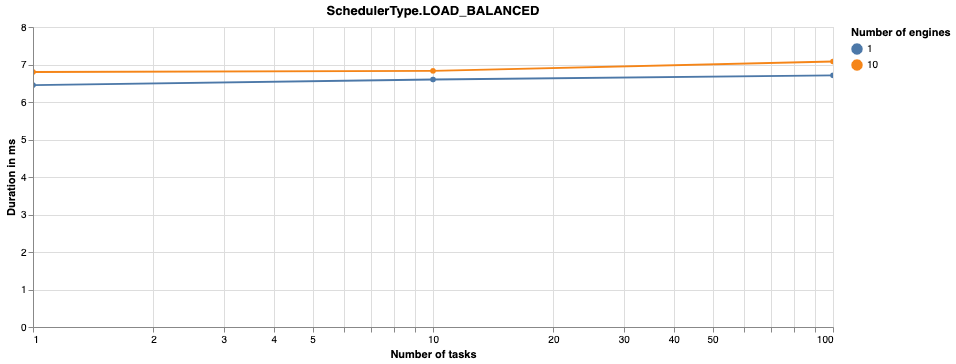

### With a delay of 0.1s. :

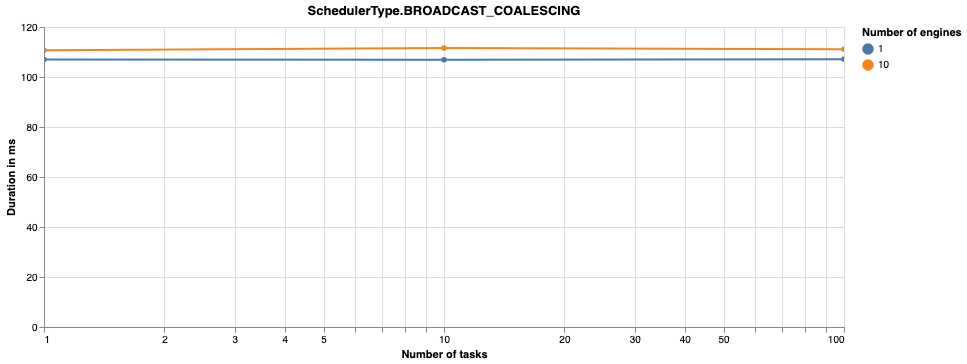

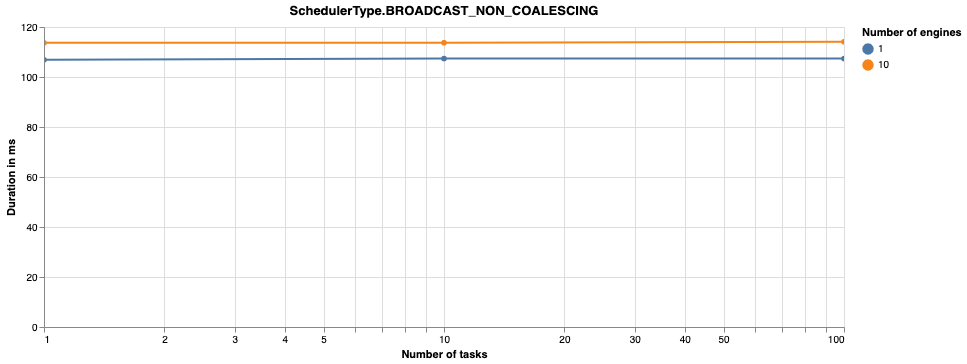

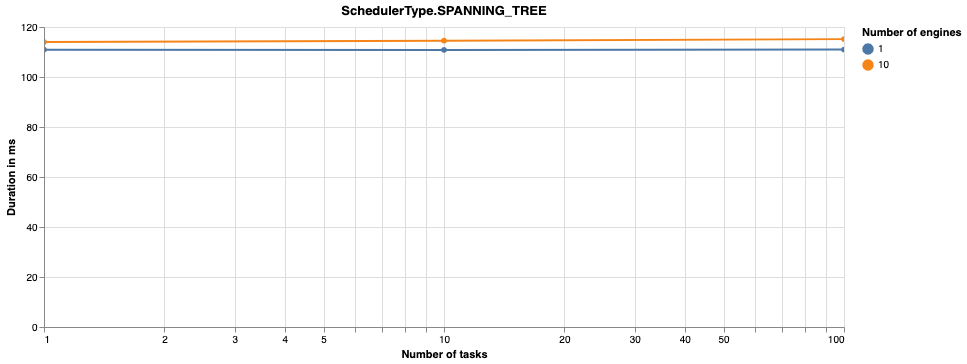

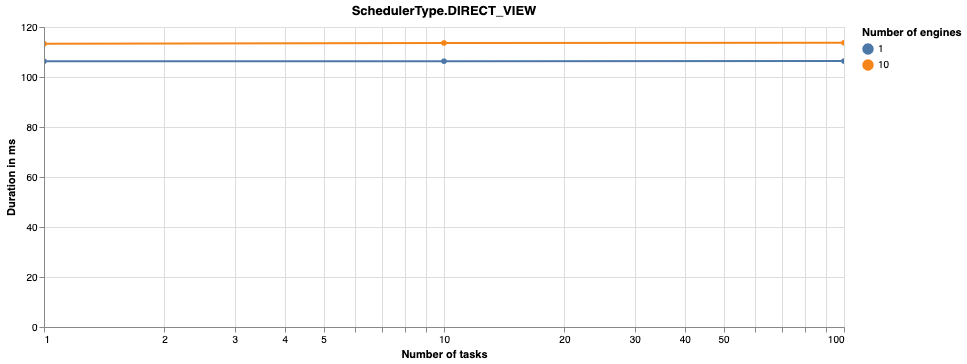

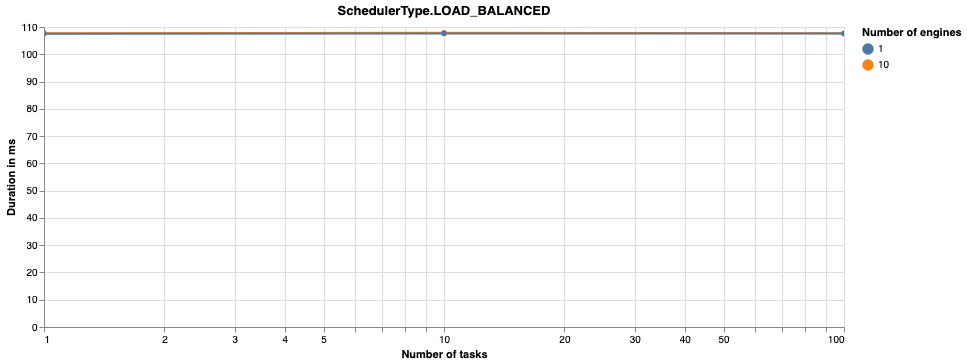

In [5]:
source = get_time_n_tasks_source(benchmark_results)
display(Markdown('## With 16 cores:'))
for delay, result_for_delay in source.items():
    display(Markdown(f'### With a delay of {ms_to_seconds(delay)}s. :'))
    for scheduler_name, results in result_for_delay[16].items():
        alt.Chart(pd.DataFrame(results)).mark_line(point=True).encode(
            alt.X('Number of tasks', scale=alt.Scale(type='log')),
            y='Duration in ms',
            color='Number of engines:N',
            tooltip='Duration in ms',
        ).properties(title=f'{scheduler_name}', width=800).interactive().display(
            renderer='svg'
        )

### With no delay and 100 engines:

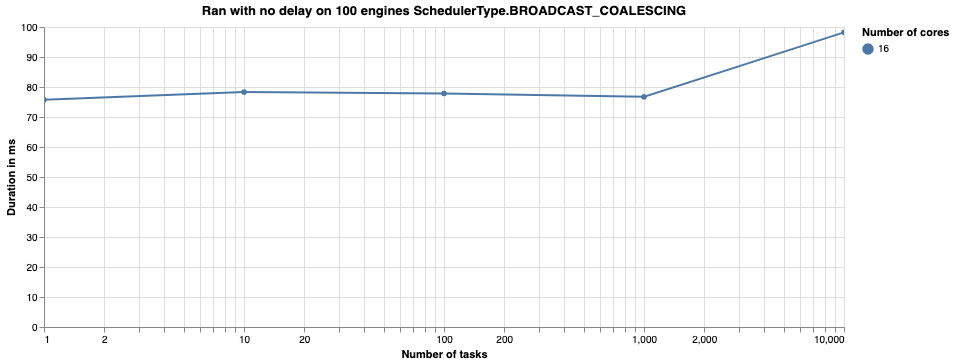

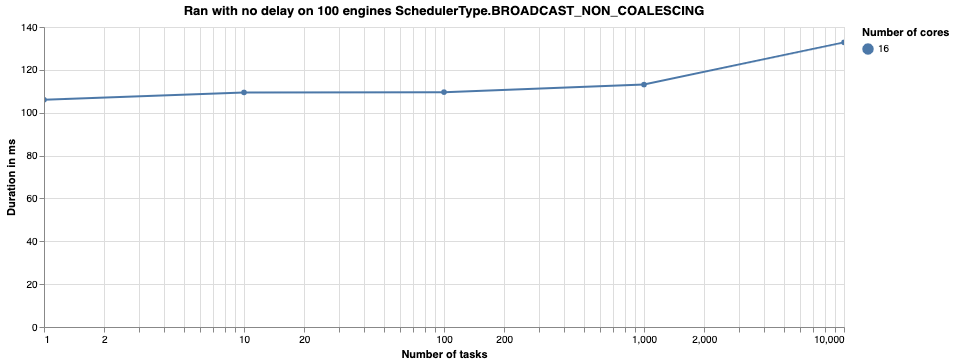

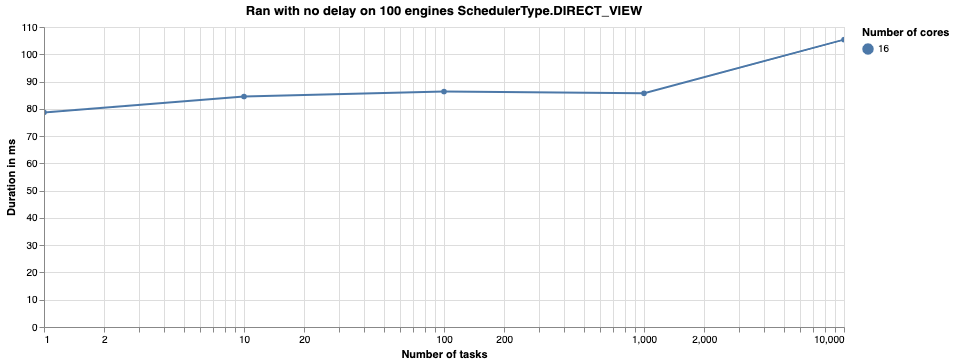

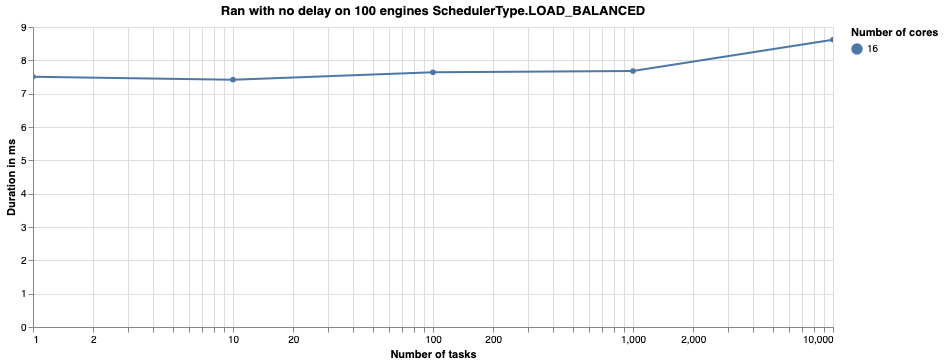

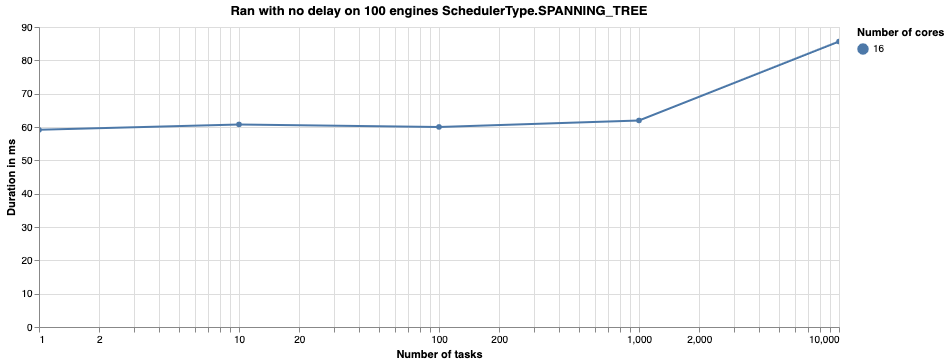

In [6]:
no_delay_source = get_no_delay_source(benchmark_results)
display(Markdown('### With no delay and 100 engines:'))
for scheduler_name, results in no_delay_source[
    BenchmarkType.TIME_N_TASKS_NO_DELAY
].items():
    data = pd.DataFrame(results)
    alt.Chart(data).mark_line(point=True).encode(
        alt.X('Number of tasks', scale=alt.Scale(type='log')),
        color='Number of cores:N',
        y='Duration in ms',
        tooltip='Duration in ms',
    ).properties(
        title=f'Ran with no delay on 100 engines {scheduler_name}', width=800
    ).interactive().display(renderer='svg')